#  A Waiter's Tips Prediction

Giving a waiter or waitress a tip does a lot for them. You are signaling to them that you appreciate them and want to give something back. Their hard work makes your experience at the restaurant more enjoyable. Many times the people serving you get paid a base, or tipped, wage, so they depend on getting a tip. We always do our best to be nice to the people helping us. It makes our day and their day a little bit better by showing respect and appreciation for them.

The model is trying to predict a watier's tip according to some features. The dataset is from the Kaggle website and includes 244 samples and 7 features. 

## <u>  Colmuns: <u>
* **total_bill** - How much the meal cost in dollars.

* **tip** - A waiter's tip (the feature we will predict).

* **sex** - Waiter's sex (male or female).

* **smoker** - If diners are smokers. 

* **day** - Day in the week.

* **time** - Dinner or Lunch.

* **size** - How many diners.
    

## <u> Part 1 : Familiarity with the dataset

Our hypothesis is that women get a higher tip than men

In [371]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn import metrics

##### Loading the dataset

In [372]:
tips =pd.read_csv('C:\\Users\\Shlomit\\Desktop\\tips.csv')
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


##### Some Samples

In [373]:
tips.sample(5)

,total_bill,tip,sex,smoker,day,time,size
156,48.17,5.00,Male,No,Sun,Dinner,6
164,17.51,3.00,Female,Yes,Sun,Dinner,2
169,10.63,2.00,Female,Yes,Sat,Dinner,2
121,13.42,1.68,Female,No,Thur,Lunch,2
159,16.49,2.00,Male,No,Sun,Dinner,4


##### Features categories

In [374]:
tips.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


##### Statics information of the dataset

In [375]:
tips.describe(include='all')

,total_bill,tip,sex,smoker,day,time,size
count,244.000000,244.000000,244,244,244,244,244.000000
unique,NaN,NaN,2,2,4,2,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN
freq,NaN,NaN,157,151,87,176,NaN
mean,19.785943,2.998279,NaN,NaN,NaN,NaN,2.569672
std,8.902412,1.383638,NaN,NaN,NaN,NaN,0.951100
min,3.070000,1.000000,NaN,NaN,NaN,NaN,1.000000
25%,13.347500,2.000000,NaN,NaN,NaN,NaN,2.000000
50%,17.795000,2.900000,NaN,NaN,NaN,NaN,2.000000
75%,24.127500,3.562500,NaN,NaN,NaN,NaN,3.000000


##### Ratio between the categorical variables

Text(0.5, 1.0, 'Day Distribution')

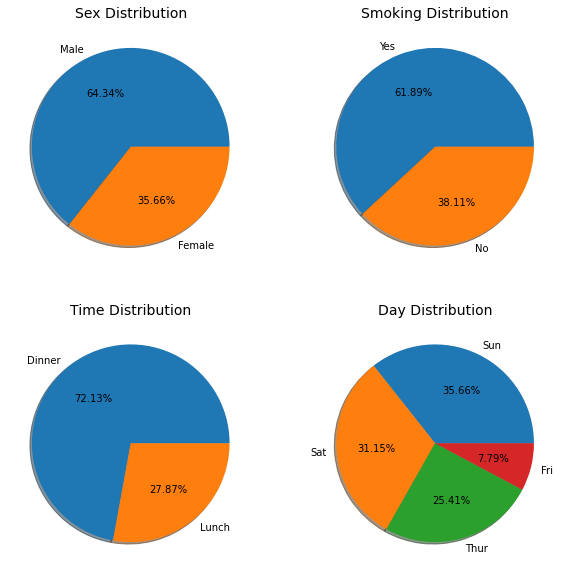

In [376]:
fig, ax = plt.subplots(2,2, figsize = (10,10))
((ax1, ax2), (ax3, ax4)) = ax

labels = ["Male", "Female"]
values = tips['sex'].value_counts().tolist()
ax1.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax1.set_title("Sex Distribution", fontdict={'fontsize': 14})

labels = ["Yes", "No"]
values = tips['smoker'].value_counts().tolist()
ax2.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax2.set_title("Smoking Distribution", fontdict={'fontsize': 14})

labels = ["Dinner", "Lunch"]
values = tips['time'].value_counts().tolist()
ax3.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax3.set_title("Time Distribution", fontdict={'fontsize': 14})

labels = ["Sun", "Sat","Thur","Fri"]
values = tips['day'].value_counts().tolist()
ax4.pie(x=values, labels=labels, autopct="%1.2f%%", shadow=True)
ax4.set_title("Day Distribution", fontdict={'fontsize': 14})

##### Normal Distribution Histogram For Total Bill

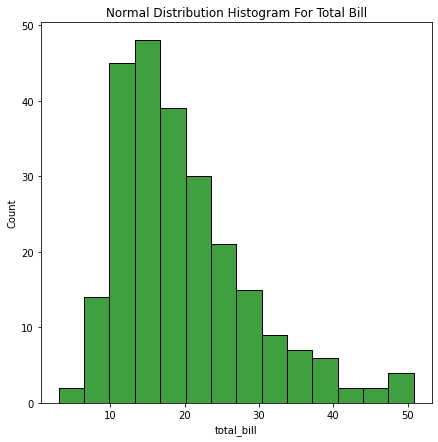

In [377]:
plt.figure(figsize=(7,7))
sns.histplot(tips[['total_bill']], x = "total_bill",color = 'g')
plt.title("Normal Distribution Histogram For Total Bill")
plt.show()

##### Check the relationship between total bill and tip

Text(0.5, 1.0, 'Relationship between total bill and tip')

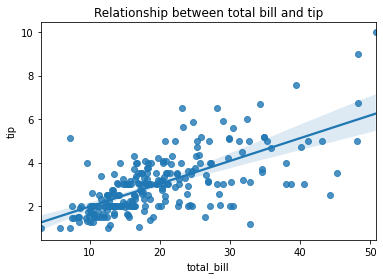

In [378]:
sns.regplot(x =tips['total_bill'], y=tips['tip'])
plt.title('Relationship between total bill and tip')

In [379]:
tips.groupby('sex').tip.mean()

sex
Female    2.833448
Male      3.089618
Name: tip, dtype: float64

As we can see our hypothesis is wrong, let's see if there is other type of group that fit to our hypothesis

In [380]:
df_smoke_sex=pd.DataFrame(tips.groupby(['smoker','sex']).tip.mean())
df_smoke_sex

tip
smoker sex             
No     Female  2.773519
       Male    3.113402
Yes    Female  2.931515
       Male    3.051167

We can see that smokers give more to women tip than no smokers

## <u> Part 2: Correlations

In [358]:
t_dummies = pd.get_dummies(tips,columns=['day'], dummy_na=False)

#1 for women and 0 for ma men
t_dummies['sex'] = np.where(t_dummies['sex']=='Female', 1, 0)
#1 for dinner and 0 for Lunch
t_dummies['time'] = np.where(t_dummies['time']=='Dinner',1, 0)
#1 for smoker and 0 for not
t_dummies['smoker'] = np.where(t_dummies['smoker']=='Yes',1, 0)

In [359]:
tips = t_dummies

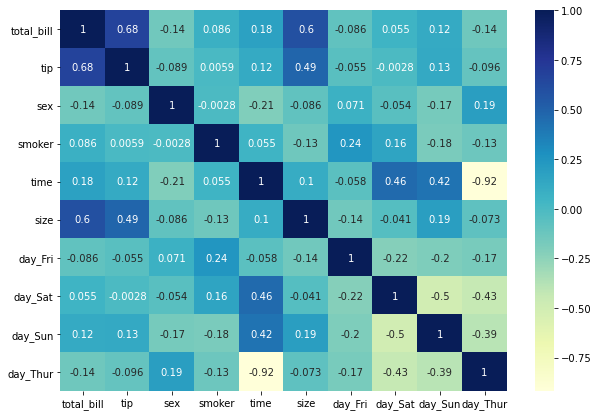

In [360]:
correlations = tips.corr()
plt.figure (figsize= (10,7))

heatmap_diabetes = sns.heatmap(tips.corr(), annot=True, cmap='YlGnBu')

plt.show()

### <U>Conclusions 

* Low correlations between sex & tip
* Low correlations between day & tip
* Low correlations between smoker & tip
* Low correlations between time & tip
   

### <U> Decisions
We decide to remove all the features that are correlate < 0.15 with tip    
* Remove sex
* Remove day   
* Remove smoker
 
    

## <U> Part 3:Select metrics scoring

* **Mean Absolute Error** Mean absolute error is a simple sum of the absolute difference between actual and predicted target value divided by a number of samples. 

MAE=∑(xi−yi)/n

* **R2**: The coefficient of determination, R2 ("R squared"), is the proportion of the variance in the dependent variable that is predictable from the independent variable(s).R2 is the percentage of the explained variance from the general variance.
The percentage of explained variance allows us to know how much of the variance of the dependent variable is explained by the independent variables.
The higher the percentage of explained variance, the more it means that X helps us predict Y.

## <U> Part 4: Train-Test-Split & Scaling 

#### Train-Test-Split

In [361]:
X = tips.drop(['tip'] , axis=1 , inplace=False)
y = tips['tip']

In [362]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20 , random_state=42)

#### Scale with MinMaxScaler

In [363]:
scaler_model = MinMaxScaler()

X_train_normalized = X_train.copy()
X_test_normalized = X_test.copy()

numerical_features = ['total_bill']

scaler_model.fit(X_train_normalized[numerical_features])

X_train_normalized['total_bill'] = scaler_model.transform(X_train_normalized[numerical_features])
#X_train_normalized['size'] = scaler_model.transform(X_train_normalized[numerical_features])
X_test_normalized['total_bill'] = scaler_model.transform(X_test_normalized[numerical_features])
#X_test_normalized['size'] = scaler_model.transform(X_test_normalized[numerical_features])

In [364]:
tips_train = pd.DataFrame(data = X_train_normalized)
tips_test = pd.DataFrame(data = X_test_normalized)

## <U>Part 5: Models

### Linear Regression

In [365]:
LR = LinearRegression()
LR.fit(tips_train, y_train)
y_pred = LR.predict(tips_train)
scores = metrics.r2_score(y_train,y_pred)
LR.score(tips_train,y_train)

0.45824907818983895

In [366]:
l_scores = cross_val_score(LR, tips_train, y_train, scoring='r2', cv=10)
print(l_scores)
np.mean(l_scores)

[ 0.09198423 -0.63151609  0.27346498  0.59174563  0.71781014  0.54577649
  0.47948388  0.54307611 -0.01127714  0.12696025]


0.2727508468939984

In [367]:
l_scores = cross_val_score(LR, tips_train, y_train, scoring='neg_mean_absolute_error', cv=10)
print(l_scores)
np.mean(l_scores)

[-0.81128514 -0.8552319  -0.85613103 -0.72515681 -0.47668956 -0.92354551
 -0.65084471 -0.87208441 -0.91689501 -0.92941313]


-0.8017277218746195

In [368]:
import xgboost as xgb


In [246]:
xgb_regressor = xgb.XGBRegressor(objective="reg:squarederror",
                                n_estimators=1000,
                                random_state=42)
xgb_regressor.fit(X_train, y_train,
                 eval_set=[(10, 10)],
                 early_stopping_rounds=10,
                 eval_metric=['rmse'], verbose=True)

C:\Users\Shlomit\anaconda3\lib\site-packages\xgboost\data.py:726: UserWarning: Unknown data type: <class 'int'>, trying to convert it to csr_matrix
  warnings.warn(


TypeError: ('Unsupported type for label', "<class 'int'>")